# Data Wrangling

### Student Name: Christian Clarke

In [56]:
#import any required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#### Step 1 – Programmatically download the required data for December 2019.

In [57]:
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv' #provide the link to the data for December 2019

#load the data into a dataframe
try:
    green_data = pd.read_csv(url, low_memory = False)
except IOError:
    print ('Unable to read the input file.')
    exit()

#### Step 2 – Report the number of rows and columns in the data.

In [58]:
#Print the number of rows and columns in data.
green_data.shape

(450627, 20)

#### Step 3 – Gather summary/descriptive statistics. State your initial observations (no more than 1 paragraph) and identify any inconsistencies. 
HINT: you can use the **describe** function

In [59]:
#display the summary statistics using the describe() function from the pandas dataframe
#state your observations or any inconsistencies that were detected in step 3
green_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,359902.000000,359902.000000,450627.000000,450627.000000,359902.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,0.0,450625.000000,450627.000000,359902.000000,359900.000000,359900.000000
mean,1.833449,1.102836,107.480599,128.446118,1.311582,3.445025,15.586714,0.888232,0.439677,0.949459,0.289563,NaN,0.270599,18.736671,1.477002,1.023226,0.426469
std,0.372575,0.623131,70.625075,76.086904,0.968107,117.057614,12.915723,1.166764,0.166541,2.182414,1.369154,NaN,0.091492,14.405428,0.521520,0.150620,0.995450
min,1.000000,1.000000,1.000000,1.000000,0.000000,-9436.330000,-200.000000,-4.500000,-0.500000,-90.500000,0.000000,NaN,-0.300000,-200.000000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,64.000000,1.000000,1.040000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.940000,11.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,14.150000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,4.000000,20.500000,1.000000,0.500000,1.560000,0.000000,NaN,0.300000,24.420000,2.000000,1.000000,0.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,77843.760000,500.000000,8.250000,3.550000,441.000000,48.000000,NaN,0.300000,500.300000,5.000000,2.000000,2.750000


Increased fare amounts lead to increased tip percentages which is interesting. The question is, do customers feel the need to tip more because they feel guilty about the long ride, is there a specific of drivers making these longer rides, do the longer rides allow customers more interaction with the drivers and thus a stronger connection leading to a better tip, or something else entirely. There are also very large trip distances as well as negative trip distances which could represent faulty devices.

#### Step 4 – Examine the data for missing observations and duplicate records. Suggest what methods are appropriate to handle them.

In [60]:
#Perform the action(s) in step 4 to handle any missing data and duplicate records that were found.
print(green_data.count())
print(pd.DataFrame(green_data.duplicated(), columns = ['tf']).groupby('tf')['tf'].count())

VendorID                 359902
lpep_pickup_datetime     450627
lpep_dropoff_datetime    450627
store_and_fwd_flag       359902
RatecodeID               359902
PULocationID             450627
DOLocationID             450627
passenger_count          359902
trip_distance            450627
fare_amount              450627
extra                    450627
mta_tax                  450627
tip_amount               450627
tolls_amount             450627
ehail_fee                     0
improvement_surcharge    450625
total_amount             450627
payment_type             359902
trip_type                359900
congestion_surcharge     359900
dtype: int64
tf
False    450626
True          1
Name: tf, dtype: int64


There are over 90,000 rows of missing data in certain columns. Thankfully passenger count, payment type, trip type are the only columns that are of concern, the others don't play a major role in any analysis we would perform. While we could keep them all by filling them with the averages for their respective columns there is little variation in them and thus their presence in the analysis probably wouldn't create much change. There is also only a singular duplicate in this data set which we can honestly just ignore becaue it won't have any weight on the analysis.

In [61]:
green_data = green_data.dropna(subset = ['trip_type'])
print(green_data.count())

VendorID                 359900
lpep_pickup_datetime     359900
lpep_dropoff_datetime    359900
store_and_fwd_flag       359900
RatecodeID               359900
PULocationID             359900
DOLocationID             359900
passenger_count          359900
trip_distance            359900
fare_amount              359900
extra                    359900
mta_tax                  359900
tip_amount               359900
tolls_amount             359900
ehail_fee                     0
improvement_surcharge    359900
total_amount             359900
payment_type             359900
trip_type                359900
congestion_surcharge     359900
dtype: int64


#### Step 5 – Plot a histogram showing the distribution of the trip distance. Discuss your observations (no more than 1 paragraph).

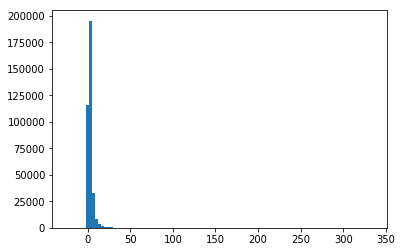

In [62]:
plt.hist(np.array(green_data['trip_distance']), bins = 100)
plt.show()

#### Step 6 – Did you detect any outliers in step 5? If so, perform a suitable method to handle them?

In [63]:
green_data = green_data[green_data['trip_distance'] < 50]
green_data = green_data[green_data['trip_distance'] >= 0]

#### Step 7 – Show the frequency of trips for each date. Do you see any interesting patterns or do you detect the need for additional data prep. rules.

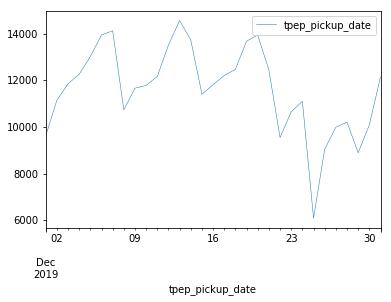

In [64]:
green_data['tpep_pickup_date'] = pd.to_datetime(green_data['lpep_pickup_datetime'])
green_data['tpep_pickup_date'] = green_data['tpep_pickup_date'].dt.normalize()
green_data.sort_values(by = ['tpep_pickup_date'], inplace = True)
green_date_data = green_data.groupby('tpep_pickup_date')['tpep_pickup_date'].count().to_frame()
green_date_data.loc['2019-12'].plot(linewidth = 0.5)

You can see the cyclical nature of the volume. The demand increases slowly throughout the week and peaks on Saturday before bottoming out on Sunday. This gets completely disrupted during the week of Christmas, with many customers traveling to be with their families and employees going on vacation there is a dip there. On top of that other customers have burned through a decent of their expendable income for the holidays we take another hit on that front.

#### Step 8 
  - (a) Create a visualization that shows how people pay for their cab rides (e.g. credit card, cash, etc.). Can you say what is the most popular mode of payment?
  - (b) Filter the data to only include customers who paid via credit card.

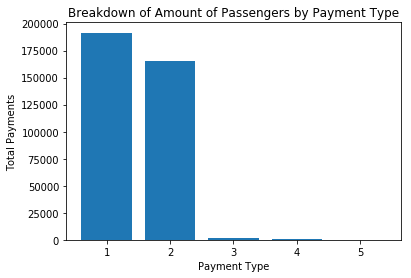

In [65]:
green_pay_data = green_data.groupby('payment_type')['payment_type'].count()
plt.bar(green_pay_data.index, green_pay_data.values)
plt.xlabel('Payment Type')
plt.ylabel('Total Payments')
plt.title('Breakdown of Amount of Passengers by Payment Type')

credit_green = green_data[green_data['payment_type'] == 1]

#### Step 9 –  Create a compelling visualization, based on your intuition, about the data and any useful insights on what factors contribute to cab driver's gratuity. 
  For example: 
  - Is there any correlation between the pickup/drop-off location and the gratuity? 
  - Does the trip distance or duration influence gratuity?

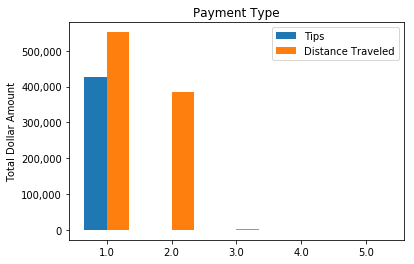

In [66]:
x = np.arange(len(green_pmnt_tip.index))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, green_pmnt_tip.values, width, label='Tips')
rects2 = ax.bar(x + width/2, green_pmnt_trip.values, width, label='Distance Traveled')
ax.set_ylabel('Total Dollar Amount')
ax.set_title('Payment Type')
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(green_pmnt_tip.index)
ax.legend()